In [ ]:
# pip install hvplot

In [1]:
# Dependencies
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# import hvplot.pandas as hvplot
import plotly as plt
import plotly.express as px

In [ ]:
# Read in candidates data
df1 = pd.read_csv("candidates_clean_st.csv")
df_cand = df1.copy()
df_cand.head()

unique_key     id  cycle fec_cand_id        cid  \
0  1996N00000948  56756   1996   P80001118  N00000948   
1  1996N00004451  58068   1996   S6MN00143  N00004451   
2  1996N00001670  57382   1996   S6DE00073  N00001670   
3  1996N00000525  57290   1996   S4VT00066  N00000525   
4  1996N00005551  53386   1996   H2OK05045  N00005551   

           first_last_party party dist_id_run_for dist_id_currently_held  \
0       Lenora B Fulani (3)     3            PRES                          
1  Stephen Bonsal Young (R)     R            MNS1                          
2  Raymond J Clatworthy (R)     R            DES2                          
3   Gavin Terence Mills (I)     U            VTS1                          
4       Ernest J Istook (R)     R            OK05                   OK05   

  current_candidate cycle_candidate crpico recip_code nopacs  \
0                                        C         3L          
1                                 Y      C         RL          
2                 Y               Y      C         RL          
3                                        C         3L          
4                 Y               Y      I         RW          

   raised_from_pacs  raised_from_individuals  raised_total  raised_unitemized  \
0               0.0                   6000.0          6000                0.0   
1             492.0                  97408.0        264254           166354.0   
2          202815.0                 618935.0       1636414           814664.0   
3               0.0                    266.0           266                0.0   
4          130384.0                  99600.0        399980           169996.0   

  state result  
0    PR      L  
1    MN      L  
2    DE      L  
3    VT      L  
4    OK      W

In [ ]:
# Read in PAC data 
# df2 = pd.read_csv("pacs.csv", on_bad_lines='skip')
# df_pac = df2.copy()
# df_pac.head()

# Cleaned
# df2 = pd.read_csv('pacs_clean.csv')
# df_pac = df2.copy()
# df_pac.head()

## <font color = 'gold'>Clean

In [ ]:
# Handle nulls
# df_pac.isnull().sum()

In [ ]:
# df_pac = df_pac.dropna()

In [ ]:
# df_pac.duplicated().sum()

In [ ]:
# Drop duplicates
# df_pac = df_pac.drop_duplicates()

In [ ]:
# df_pac.to_csv('pacs_clean.csv')

In [ ]:
# # Join pac and candidates dfs
# df_paccand = df_cand.merge(df_pac, how='left', on='cid')
# df_paccand.head()

## <font color = 'gold'>Explore Features

In [ ]:
# See if cycle_candidate is significant
# if there are W and blank c_c, then it's significant
# if there L for every blank c_c, insignificant - drop
# df3 = df_cand[(df_cand['cycle_candidate'] == ' ') & (df_cand['result'] == 'W')]
# df3.head(10)

# KEEP for now, but test both ways.

In [ ]:
# Choose columns for features
columns = ['party', 'crpico', 'raised_from_pacs', 'raised_from_individuals',	'raised_total',	'raised_unitemized', 'result']

# # consider dropping later:
#   #cycle_candidate
#   #nopacs
#   #dist_id_currently_held

df_features = df_cand[columns]
df_features.head()

party crpico  raised_from_pacs  raised_from_individuals  raised_total  \
0     3      C               0.0                   6000.0          6000   
1     R      C             492.0                  97408.0        264254   
2     R      C          202815.0                 618935.0       1636414   
3     U      C               0.0                    266.0           266   
4     R      I          130384.0                  99600.0        399980   

   raised_unitemized result  
0                0.0      L  
1           166354.0      L  
2           814664.0      L  
3                0.0      L  
4           169996.0      W

In [ ]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19863 entries, 0 to 19862
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   party                    19863 non-null  object 
 1   crpico                   19863 non-null  object 
 2   raised_from_pacs         19863 non-null  float64
 3   raised_from_individuals  19863 non-null  float64
 4   raised_total             19863 non-null  int64  
 5   raised_unitemized        19863 non-null  float64
 6   result                   19863 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 1.1+ MB


In [ ]:
df_features.nunique()

party                          4
crpico                         5
raised_from_pacs           11607
raised_from_individuals    15530
raised_total               17987
raised_unitemized          14653
result                         2
dtype: int64

In [ ]:
# df_features = df_features[df_features['party'].isin(['R','D'])]

In [ ]:
df_features.party.value_counts

<bound method IndexOpsMixin.value_counts of 1        R
2        R
4        R
5        R
6        R
8        R
9        D
10       R
11       R
12       D
13       D
14       R
15       R
16       D
17       D
18       R
19       R
20       D
21       D
22       R
24       R
25       D
26       R
27       D
28       D
29       D
30       D
31       D
32       D
33       D
34       R
35       R
36       R
37       D
38       R
39       D
40       R
42       R
43       R
44       R
45       R
46       R
47       R
48       R
49       R
50       R
51       R
52       R
54       R
55       D
56       D
57       D
58       R
59       D
60       R
61       R
62       D
63       R
64       R
66       D
67       R
68       D
69       R
70       R
71       R
72       D
73       R
74       D
76       R
77       D
78       D
79       D
80       D
81       R
82       D
83       R
84       R
85       R
86       D
87       D
88       R
89       D
90       D
91       D
92       R
93       D
94       R

## <font color = 'gold'>Preprocessing
### Categorical Variables
#### <font color = 'skyblue'>Bucket

In [ ]:
for col in df_features.columns:
  print(df_features[col][0:2].value_counts())

# drop nopacs, bucket crpico 

R    2
Name: party, dtype: int64
C    2
Name: crpico, dtype: int64
492.0       1
202815.0    1
Name: raised_from_pacs, dtype: int64
97408.0     1
618935.0    1
Name: raised_from_individuals, dtype: int64
264254     1
1636414    1
Name: raised_total, dtype: int64
166354.0    1
814664.0    1
Name: raised_unitemized, dtype: int64
L    2
Name: result, dtype: int64


In [ ]:
# state_1 = list(df_features.state.value_counts().index)

In [ ]:
# get value counts variable
crpico_type = df_features['crpico'].value_counts()
crpico_type

C    8509
I    5659
O    4291
       66
Name: crpico, dtype: int64

In [ ]:
# Determine which values to replace if counts are less than 100?
replace_crpico = list(crpico_type[crpico_type < 100].index)

# Replace in dataframe
for cls in replace_crpico:
    df_features.crpico = df_features.crpico.replace(cls,"Other")
    
# Check to make sure binning was successful
df_features.crpico.value_counts()

C        8509
I        5659
O        4291
Other      66
Name: crpico, dtype: int64

In [ ]:
# encode W/L of 'result' column by mapping
x = {'W': 1, 'L': 0}
df_features = df_features.replace(x)
df_features.head()

party crpico  raised_from_pacs  raised_from_individuals  raised_total  \
1     R      C             492.0                  97408.0        264254   
2     R      C          202815.0                 618935.0       1636414   
4     R      I          130384.0                  99600.0        399980   
5     R      C               0.0                   5576.0         18050   
6     R      C            2000.0                  72177.0        184925   

   raised_unitemized  result  
1           166354.0       0  
2           814664.0       0  
4           169996.0       1  
5            12474.0       0  
6           110748.0       0

In [ ]:
df_features.nunique()

party                          2
crpico                         4
raised_from_pacs           11469
raised_from_individuals    14942
raised_total               17058
raised_unitemized          14112
result                         2
dtype: int64

In [ ]:
# # get value counts variable
# party_type = df_features['party'].value_counts()
# party_type

# # Determine which values to replace if counts are less than 100?
# rep_party = list(party_type[party_type < 1000].index)

# # Replace in dataframe
# for cls in rep_party:
#     df_features.party = df_features.party.replace(cls,"Other")
    
# # Check to make sure binning was successful
# df_features.party.value_counts()

#### <font color = 'skyblue'>Encode

In [ ]:
# # Encode State with label encoder ###############
# le = LabelEncoder()
# df_features['state'] = le.fit_transform(df_features['state'])

In [ ]:
# generate categorical variable list
catvars = df_features.dtypes[df_features.dtypes == 'object'].index
catvars

Index(['party', 'crpico'], dtype='object')

In [ ]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_features[catvars]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(catvars)
encode_df.head()

party_D  party_R  crpico_C  crpico_I  crpico_O  crpico_Other
0      0.0      1.0       1.0       0.0       0.0           0.0
1      0.0      1.0       1.0       0.0       0.0           0.0
2      0.0      1.0       0.0       1.0       0.0           0.0
3      0.0      1.0       1.0       0.0       0.0           0.0
4      0.0      1.0       1.0       0.0       0.0           0.0

In [ ]:
# Merge one-hot encoded features and drop the originals
encoded_df = df_features.merge(encode_df, left_index=True, right_index=True)
encoded_df = encoded_df.drop(catvars, axis=1)
encoded_df.head()

raised_from_pacs  raised_from_individuals  raised_total  raised_unitemized  \
1             492.0                  97408.0        264254           166354.0   
2          202815.0                 618935.0       1636414           814664.0   
4          130384.0                  99600.0        399980           169996.0   
5               0.0                   5576.0         18050            12474.0   
6            2000.0                  72177.0        184925           110748.0   

   result  party_D  party_R  crpico_C  crpico_I  crpico_O  crpico_Other  
1       0      0.0      1.0       1.0       0.0       0.0           0.0  
2       0      0.0      1.0       0.0       1.0       0.0           0.0  
4       1      0.0      1.0       1.0       0.0       0.0           0.0  
5       0      0.0      1.0       0.0       0.0       1.0           0.0  
6       0      1.0      0.0       1.0       0.0       0.0           0.0

In [ ]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17405 entries, 1 to 18524
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   raised_from_pacs         17405 non-null  float64
 1   raised_from_individuals  17405 non-null  float64
 2   raised_total             17405 non-null  int64  
 3   raised_unitemized        17405 non-null  float64
 4   result                   17405 non-null  int64  
 5   party_D                  17405 non-null  float64
 6   party_R                  17405 non-null  float64
 7   crpico_C                 17405 non-null  float64
 8   crpico_I                 17405 non-null  float64
 9   crpico_O                 17405 non-null  float64
 10  crpico_Other             17405 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 1.6 MB


#### <font color= 'skyblue'>Create Features and Target Arrays

In [ ]:
# Split preprocessed data into features and target arrays
y = encoded_df.result.values
X = encoded_df.drop('result', axis=1).values

<font color= 'skyblue'>Split to Training and Testing data

In [ ]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

<font color= 'skyblue'>Standard Scale

In [ ]:
# Scale / Standardize feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
# view data to ensure successful standardization
X_train_scaled[:1]

array([[ 0.2338947 , -0.03781583, -0.00865679, -0.07615096, -0.95160257,
         0.95160257, -0.9286118 , -0.6588478 ,  1.82504511, -0.05815732]])

## <font color='gold'>Model - Random Forest Classifier

In [ ]:
# Resample the training data with the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=43)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=43)

In [ ]:
# Calculate the accuracy score
y_true = y_test
y_pred = clf.predict(X_test_scaled)
print(f"Accuracy Score: {accuracy_score(y_true, y_pred)}")
print("\n---------------------------------------------------------------------------------\n")


# Display the confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(cm, index=["Lose", "Win"], columns=["Predicted Lose", "Predicted Win"])
print(cm_df)
print("\n---------------------------------------------------------------------------------\n")

# Print the imbalanced classification report
print(classification_report(y_true, y_pred))

Accuracy Score: 0.9385823600483286

---------------------------------------------------------------------------------

      Predicted Lose  Predicted Win
Lose            3190            175
Win              130           1471

---------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      3365
           1       0.89      0.92      0.91      1601

    accuracy                           0.94      4966
   macro avg       0.93      0.93      0.93      4966
weighted avg       0.94      0.94      0.94      4966



## <font color='gold'>KMeans Clustering

In [ ]:
# Initialize df from copy
df_clust = df1.copy()
df_clust.head()

unique_key     id  cycle fec_cand_id        cid  \
0  1996N00000948  56756   1996   P80001118  N00000948   
1  1996N00004451  58068   1996   S6MN00143  N00004451   
2  1996N00001670  57382   1996   S6DE00073  N00001670   
3  1996N00000525  57290   1996   S4VT00066  N00000525   
4  1996N00005551  53386   1996   H2OK05045  N00005551   

           first_last_party party dist_id_run_for dist_id_currently_held  \
0       Lenora B Fulani (3)     3            PRES                          
1  Stephen Bonsal Young (R)     R            MNS1                          
2  Raymond J Clatworthy (R)     R            DES2                          
3   Gavin Terence Mills (I)     U            VTS1                          
4       Ernest J Istook (R)     R            OK05                   OK05   

  current_candidate cycle_candidate crpico recip_code nopacs  \
0                                        C         3L          
1                                 Y      C         RL          
2                 Y               Y      C         RL          
3                                        C         3L          
4                 Y               Y      I         RW          

   raised_from_pacs  raised_from_individuals  raised_total  raised_unitemized  \
0               0.0                   6000.0          6000                0.0   
1             492.0                  97408.0        264254           166354.0   
2          202815.0                 618935.0       1636414           814664.0   
3               0.0                    266.0           266                0.0   
4          130384.0                  99600.0        399980           169996.0   

  state result  
0    PR      L  
1    MN      L  
2    DE      L  
3    VT      L  
4    OK      W

In [ ]:
# isolate first_last_
name = pd.DataFrame(df_clust.first_last_party)
name.head()

first_last_party
0       Lenora B Fulani (3)
1  Stephen Bonsal Young (R)
2  Raymond J Clatworthy (R)
3   Gavin Terence Mills (I)
4       Ernest J Istook (R)

In [ ]:
# Choose features
df_clust = df_clust[['party', 'state', 'crpico', 'raised_from_pacs',	'raised_from_individuals', 'raised_unitemized']]
df_clust.head()

party state crpico  raised_from_pacs  raised_from_individuals  \
0     3    PR      C               0.0                   6000.0   
1     R    MN      C             492.0                  97408.0   
2     R    DE      C          202815.0                 618935.0   
3     U    VT      C               0.0                    266.0   
4     R    OK      I          130384.0                  99600.0   

   raised_unitemized  
0                0.0  
1           166354.0  
2           814664.0  
3                0.0  
4           169996.0

In [ ]:
# encode cat variables
X = pd.get_dummies(df_clust, columns=['party','state','crpico'])
X.head()

raised_from_pacs  raised_from_individuals  raised_unitemized  party_3  \
0               0.0                   6000.0                0.0        1   
1             492.0                  97408.0           166354.0        0   
2          202815.0                 618935.0           814664.0        0   
3               0.0                    266.0                0.0        0   
4          130384.0                  99600.0           169996.0        0   

   party_D  party_R  party_U  state_AK  state_AL  state_AR  ...  state_VT  \
0        0        0        0         0         0         0  ...         0   
1        0        1        0         0         0         0  ...         0   
2        0        1        0         0         0         0  ...         0   
3        0        0        1         0         0         0  ...         1   
4        0        1        0         0         0         0  ...         0   

   state_WA  state_WI  state_WV  state_WY  crpico_   crpico_3  crpico_C  \
0         0         0         0         0         0         0         1   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         0         0         0         1   
4         0         0         0         0         0         0         0   

   crpico_I  crpico_O  
0         0         0  
1         0         0  
2         0         0  
3         0         0  
4         1         0  

[5 rows x 68 columns]

In [ ]:
# Standardize data
X_scaled = StandardScaler().fit_transform(X)
X_scaled[0:1]

array([[-1.96995688e-01, -8.95969907e-02, -1.04459677e-01,
         5.91470165e+00, -8.89967743e-01, -9.81493276e-01,
        -2.02981395e-01, -6.59430483e-02, -1.26120185e-01,
        -1.05342163e-01, -3.54994040e-02, -1.43359047e-01,
        -3.52561401e-01, -1.26941642e-01, -1.09890026e-01,
        -3.62033432e-02, -6.03159787e-02, -2.27323021e-01,
        -1.74659201e-01, -3.09429839e-02, -8.51558647e-02,
        -1.11057301e-01, -7.95799083e-02, -2.06849327e-01,
        -1.57029427e-01, -1.03121131e-01, -1.16060652e-01,
        -1.19574729e-01, -1.43724382e-01, -1.48575619e-01,
        -8.98299924e-02, -1.77847663e-01, -1.39094298e-01,
        -1.51383226e-01, -1.22905412e-02, -1.04113854e-01,
        -6.78414927e-02, -1.73584933e-01, -5.36462094e-02,
        -8.89717312e-02, -9.09621442e-02, -1.63474373e-01,
        -9.56292184e-02, -9.37346568e-02, -2.27690206e-01,
        -1.97128975e-01, -1.22571457e-01, -1.20007150e-01,
        -2.03786710e-01,  1.00170773e+01, -7.66440475e-0

### PCA

In [ ]:
# Reduce dimensions using PCA
pca = PCA(n_components=3)
cand_pca = pca.fit_transform(X_scaled)

In [ ]:
# Create a DataFrame with the three principal components.
pca_df = pd.DataFrame(data=cand_pca, columns=["PC 1", "PC 2", "PC 3"], index=df_clust.index)
pca_df.head(10)

PC 1      PC 2      PC 3
0  1.585775  0.963927  4.532503
1 -0.684744  1.382195  1.230122
2 -0.306320  1.599249  0.860676
3 -0.970193  0.504806  2.928478
4  0.171304  0.859928 -1.816436
5 -0.656219  1.422873  0.557830
6 -0.700442  1.618683  0.651318
7 -0.366237  0.204642  0.144137
8 -0.195004  1.367857 -1.437263
9 -0.363857 -1.247595  1.166228

### Elbow Curve

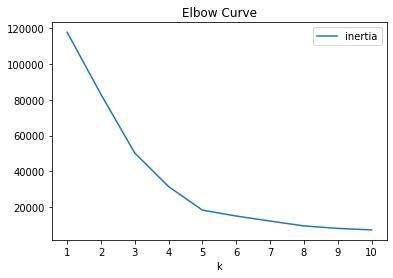

In [ ]:
# Create an Elbow Curve to find the best value for K.

inertia = []
k = list(range(1,11))

# Get / store inertia values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_df)
    inertia.append(km.inertia_)
    
# Define DF to plot Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.plot(kind='line', x='k', y='inertia', title="Elbow Curve", xticks=k)

Clustering

In [ ]:
# Initialize the K-Means model.
model = KMeans(n_clusters=5, random_state=0)

# Fit the model
model.fit(pca_df)

# Predict clusters
predicts = model.predict(pca_df)

In [ ]:
# Create a new DataFrame including predicted clusters and candidate features.
# Concatentate the df_clust and pcs_df DataFrames on the same columns.
clustered_df = df_clust.join(pca_df, how='inner')

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df = clustered_df.join(name, how='inner')

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df['Class'] = model.labels_

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(19863, 11)


party state crpico  raised_from_pacs  raised_from_individuals  \
0     3    PR      C               0.0                   6000.0   
1     R    MN      C             492.0                  97408.0   
2     R    DE      C          202815.0                 618935.0   
3     U    VT      C               0.0                    266.0   
4     R    OK      I          130384.0                  99600.0   
5     R    MI      C               0.0                   5576.0   
6     R    TX      C            2000.0                  72177.0   
7     U    FL      O               0.0                   3436.0   
8     R    FL      O             500.0                  40500.0   
9     D    MI      C               0.0                  42841.0   

   raised_unitemized      PC 1      PC 2      PC 3          first_last_party  \
0                0.0  1.583016  0.977714  4.522059       Lenora B Fulani (3)   
1           166354.0 -0.645270  1.394525  1.111065  Stephen Bonsal Young (R)   
2           814664.0 -0.317805  1.575669  0.739179  Raymond J Clatworthy (R)   
3                0.0 -0.957697  0.392390  2.925143   Gavin Terence Mills (I)   
4           169996.0  0.151808  0.906764 -1.799034       Ernest J Istook (R)   
5            12474.0 -0.660234  1.306777  0.578781  Stephen Wayne Hofman (R)   
6           110748.0 -0.695957  1.599964  0.576127  Olivia Coggin Eudaly (R)   
7             1946.0 -0.356036  0.239608  0.175397       H Harold Hardee (I)   
8            61320.0 -0.191055  1.397627 -1.386902       Joseph Dr Smith (R)   
9            35855.0 -0.369266 -1.362960  1.194479     Godfrey J Dillard (D)   

   Class  
0      0  
1      3  
2      3  
3      0  
4      1  
5      3  
6      3  
7      3  
8      1  
9      0

In [ ]:
clustered_df.groupby('Class')['Class'].count()

Class
0    4979
1    5049
2    4873
3    4954
4       8
Name: Class, dtype: int64

In [ ]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    color="Class",
    symbol="Class",
    hover_name="first_last_party",
    hover_data=["crpico"],
    width=800
)
fig.update_layout(legend=dict(x=0,y=1))
fig.show()

## <font color='gold'>2022 Predictions

In [ ]:
df3 = pd.read_csv('cand_summary_2022_clean.csv')
df_2022 = df3.copy()
df_2022.fillna('',inplace=True)
print(df_2022.party.value_counts())
# df_2022 = df_2022[df_2022['raised_total'] > 0]
df_2022 = df_2022.reset_index().drop('index', axis=1)
df_2022.head()

R    2110
D    1551
3     706
Name: party, dtype: int64


first_last_party Cand_Office_St Cand_Office party crpico  \
0            GODFREY, MARCUS SCOTT             CA       House     3      C   
1          NICHOLAS CRANE, STRAUSS             MO      Senate     3      O   
2                   PINNEY, DWAYNE             FL      Senate     R      C   
3  DEHART, VAUGHAN BRANDON BRENDAN             AZ       House     R      C   
4                   NEUBERT, KEITH             WI      Senate     R      C   

   raised_from_pacs  raised_from_individuals  raised_total  raised_unitemized  
0               0.0                      0.0           0.0                0.0  
1               0.0                      0.0           0.0                0.0  
2               0.0                      0.0           0.0                0.0  
3               0.0                      0.0           0.0                0.0  
4               0.0                      0.0           0.0                0.0

In [ ]:
features_2022 = df_2022.drop(['first_last_party','Cand_Office_St', 'Cand_Office'], axis=1)

In [ ]:
cols = list(features_2022.columns)
new_cols = list((cols[1], cols[0]))
new_cols = new_cols + cols[2:]
features_2022 = features_2022[new_cols]
features_2022 = features_2022.reset_index().drop('index', axis=1)
features_2022.head()

crpico party  raised_from_pacs  raised_from_individuals  raised_total  \
0      C     3               0.0                      0.0           0.0   
1      O     3               0.0                      0.0           0.0   
2      C     R               0.0                      0.0           0.0   
3      C     R               0.0                      0.0           0.0   
4      C     R               0.0                      0.0           0.0   

   raised_unitemized  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0

In [ ]:
##### Explore why States don't match up in both DFs
features_2022.nunique()

crpico                        4
party                         3
raised_from_pacs            946
raised_from_individuals    2378
raised_total               2451
raised_unitemized          2226
dtype: int64

In [ ]:
# features_2022 = features_2022[features_2022['party'].isin(['R','D'])]

In [ ]:
features_2022.party.value_counts()

R    2110
D    1551
Name: party, dtype: int64

In [ ]:
features_2022.crpico = features_2022.crpico.replace('','Other')

In [ ]:
features_2022.crpico.value_counts()

C        2358
O         819
I         409
Other      75
Name: crpico, dtype: int64

In [ ]:
# diff = []
# state_1
# state_2 = list(features_2022.Cand_Office_St.value_counts().index)
# for i in state_2:
#   if i in state_1:
#     continue
#   else:
#     diff.append(i)
# diff

In [ ]:
# print(state_1)
# print(state_2)

In [ ]:
# features_2022_us = features_2022[features_2022['Cand_Office_St'] == 'US']
# features_2022_us.raised_total.value_counts()

In [ ]:
# features_2022 = features_2022[features_2022['Cand_Office_St'] != 'US']

#### <font color='skyblue'>Encode

In [ ]:
# # Encode State with label encoder ###############
# le = LabelEncoder()
# features_2022['Cand_Office_St'] = le.fit_transform(features_2022['Cand_Office_St'])

In [ ]:
# generate categorical variable list
catvars = features_2022.dtypes[features_2022.dtypes == 'object'].index
catvars

Index(['crpico', 'party'], dtype='object')

In [ ]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(features_2022[catvars]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(catvars)
encode_df.head()

crpico_C  crpico_I  crpico_O  crpico_Other  party_D  party_R
0       1.0       0.0       0.0           0.0      0.0      1.0
1       1.0       0.0       0.0           0.0      0.0      1.0
2       1.0       0.0       0.0           0.0      0.0      1.0
3       1.0       0.0       0.0           0.0      1.0      0.0
4       1.0       0.0       0.0           0.0      0.0      1.0

In [ ]:
# Merge one-hot encoded features and drop the originals
encoded_df = features_2022.merge(encode_df, left_index=True, right_index=True)
encoded_df = encoded_df.drop(catvars, axis=1)
encoded_df.head()

raised_from_pacs  raised_from_individuals  raised_total  raised_unitemized  \
2               0.0                     0.00          0.00               0.00   
3               0.0                     0.00          0.00               0.00   
4               0.0                     0.00          0.00               0.00   
5           15650.0                225138.07     243859.84           62498.32   
6           32700.0                949909.38     982705.38          424071.73   

   crpico_C  crpico_I  crpico_O  crpico_Other  party_D  party_R  
2       1.0       0.0       0.0           0.0      0.0      1.0  
3       1.0       0.0       0.0           0.0      1.0      0.0  
4       1.0       0.0       0.0           0.0      0.0      1.0  
5       1.0       0.0       0.0           0.0      0.0      1.0  
6       1.0       0.0       0.0           0.0      1.0      0.0

In [ ]:
# Split preprocessed data into features
X = encoded_df.values

In [ ]:
# Scale / Standardize feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# view data to ensure successful standardization
X_scaled[:1]

array([[-0.24050491, -0.20396394, -0.22985931, -0.13573028,  0.74298062,
        -0.35851737, -0.53256524, -0.14584075, -0.84888439,  0.84888439]])

In [ ]:
# Predict 2022 election Results
predictions_2022 = clf.predict(X_scaled)

In [ ]:
preds = pd.Series(predictions_2022, name='preds')
predicted_2022 = df_2022.merge(preds, left_index=True, right_index=True)

In [ ]:
pd.set_option('display.max_rows', None)
predicted_2022['preds'] = predicted_2022['preds'].replace({
    0: 'L',
    1: 'W'
})
predicted_2022 = predicted_2022.sort_values(by=['Cand_Office_St', 'first_last_party'], ignore_index=True)
predicted_2022

first_last_party Cand_Office_St Cand_Office  \
0                       AGUAYO, DENNIS W. 'DENNY'             AK       House   
1                                ARMSTRONG, JAY R             AK       House   
2                                  BEAL, BRIAN T.             AK       House   
3                                       BECK, TIM             AK       House   
4                            BEGICH, NICHOLAS III             AK       House   
5                                   BROWN, ROBERT             AK       House   
6                               CALLAHAN, JOHN T.             AK       House   
7                                   CARLE, ARLENE             AK       House   
8                               CHESBRO, PATRICIA             AK      Senate   
9                                    CLAUS, SANTA             AK       House   
10                                 CROPLEY, TYLER             AK       House   
11                                 DARDEN, DUSTIN             AK      Senate   
12                       EVANS, SHANNON SCOTT MR.             AK       House   
13                        FLORSCHUTZ, OTTO H. III             AK       House   
14                              FOSTER, LAUREL A.             AK       House   
15                       GIBBONS, THOMAS R. 'TOM'             AK       House   
16                                 GRIFFIN, KARYN             AK       House   
17                                 HEINTZ, TED S.             AK       House   
18                              HIBLER, WILLIAM D             AK       House   
19                               HOWE, JOHN WAYNE             AK       House   
20                                HUGHES, DAVID M             AK       House   
21                                    KNIGHT, DON             AK       House   
22                      LEBLANC, DAVIS LEE MR. JR             AK       House   
23                                   LEE, HUHNKIE             AK      Senate   
24                                 LITTLE, SAMUAL             AK      Senate   
25                                 MCCABE, ANNE M             AK       House   
26                             MELANDER, MIKEL E.             AK       House   
27                                 MILLIGAN, MIKE             AK       House   
28                                    MYERS, J.R.             AK       House   
29                                    NOTTI, EMIL             AK       House   
30                                ORNELAS, ROBERT             AK       House   
31                          PELLEGRINI, SILVIO E.             AK       House   
32                                  PELTOLA, MARY             AK       House   
33                                   PEREZ, JULIO             AK       House   
34                                  PURHAM, RANDY             AK       House   
35                             REVAK, JOSHUA CARL             AK       House   
36                                SEGOVIA, CARMEN             AK      Senate   
37          STEPHENS, JOE TRUMP AKA NOT MURKOWSKI             AK      Senate   
38                                SUMNER, MAXWELL             AK       House   
39                                SWEENEY, TARA M             AK       House   
40                                 THISTLE, DAVID             AK       House   
41                              THOMAS, ERNEST F.             AK       House   
42                           THORNE, SEAN MICHAEL             AK      Senate   
43                     TROTTER, RICHARD 'CLAYTON'             AK       House   
44                             WELTER, BRADLEY D.             AK       House   
45                             WILLIAMS, JASON G.             AK       House   
46                                   WOODWARD, JO             AK       House   
47                              WRIGHT, STEPHEN T             AK       House   
48                            ALCORN, PETER DAVID             AL       House   
49                               

In [ ]:
predicted_2022['preds'].value_counts()

L    2695
W     378
Name: preds, dtype: int64

In [ ]:
# predicted_2022.to_csv('prediction_results.csv', index=False)

In [ ]:
# predicted_2022.to_json('prediction_results.json', orient="records", indent=4)

## <font color='gold'>Setting State  Seat requirements

In [2]:
# Read in prediction results (from above)
df = pd.read_csv("prediction_results.csv")
df.head()

first_last_party Cand_Office_St Cand_Office party crpico  \
0  AGUAYO, DENNIS W. 'DENNY'             AK       House     3      O   
1           ARMSTRONG, JAY R             AK       House     R      O   
2             BEAL, BRIAN T.             AK       House     3      O   
3                  BECK, TIM             AK       House     3      O   
4       BEGICH, NICHOLAS III             AK       House     R      C   

   raised_from_pacs  raised_from_individuals  raised_total  raised_unitemized  \
0              0.00                     0.00          0.00               0.00   
1              0.00                     0.00          0.00               0.00   
2              0.00                     0.00          0.00               0.00   
3              0.00                     0.00          0.00               0.00   
4          38313.67                637899.67     676925.52             712.18   

  preds  
0     L  
1     L  
2     L  
3     L  
4     L

In [3]:
# Get list of Distinct states
state_2 = list(df.Cand_Office_St.value_counts().index)
state_2.sort()
len(state_2)

57

In [4]:
# Create Series for state seat counts
seats = [7,1,9,4,53,7,5,1,27,14,2,2,18,9,4,4,6,6,2,8,9,14,8,4,8,1,3,4,2,12,3,27,13,1,16,5,5,18,2,7,1,9,36,4,1,11,10,3,8,1]
states = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID',"IL",'IN','IA','KS','KY','LA','ME','MD','MA','MI',"MN","MS",'MO','MT',"NE",'NV','NH',"NJ",'NM','NY','NC','ND',"OH",'OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']

state_seats = pd.Series(seats, index=states, name='seats').sort_index()
print(len(state_seats))
state_seats[0:5]

50


AK     1
AL     7
AR     4
AZ     9
CA    53
Name: seats, dtype: int64

In [5]:
# get df of winners
winners_df = df[df['preds']=='W']
# count winners per state in df
state_winners = winners_df.groupby("Cand_Office_St").preds.count()
state_winners = pd.Series(state_winners)
len(state_winners)

52

In [6]:
# diff state_winners, state_seats
# drop states from winners_df not in list of state abbreviations
for idx,i in state_winners.items():
  if idx not in states:
    winners_df = winners_df[winners_df['Cand_Office_St'] != idx]

#redefine state_winners after states dropped
state_winners = winners_df.groupby("Cand_Office_St").preds.count()
# create list of state_winners index
state_winners_index = state_winners.index.values.tolist()

# loop through state abbreviations if not in list of index, append the series with 0
for j in states:
  if j not in state_winners_index:
    state_winners = state_winners.append(pd.Series(0, index=[j]))
  
state_winners = state_winners.sort_index()
state_winners = pd.Series(state_winners, name='winners')
print(len(state_winners))
state_winners[:5]

50


AK     0
AL     6
AR     5
AZ    11
CA    52
Name: winners, dtype: int64

In [7]:
print(len(state_seats))
print(len(state_winners))
print(state_seats[-2:-1])
print(state_winners[-2:-1])
print(type(state_seats))
print(type(state_winners))

50
50
WV    3
Name: seats, dtype: int64
WV    3
Name: winners, dtype: int64
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [13]:
# Create DFs, combine, and find difference
state_seats_df = pd.DataFrame(state_seats)
state_winners_df = pd.DataFrame(state_winners)
state_seats_diff_df = state_seats_df.join(state_winners_df)
state_seats_diff_df = state_seats_diff_df.rename(columns={'seats':'Seats','winners':'Winners'})
state_seats_diff_df['Difference'] = state_seats_diff_df['Winners'] - state_seats_diff_df['Seats']
print(len(state_seats_diff_df))
state_seats_diff_df

In [11]:
# using compare
state_seats_diff_df2 = state_seats.compare(state_winners,keep_shape=True, keep_equal=True)

self  other
AK     1      0
AL     7      6
AR     4      5
AZ     9     11
CA    53     52
CO     7     10
CT     5      7
DE     1      0
FL    27     25
GA    14     14
HI     2      1
IA     4      4
ID     2      3
IL    18     21
IN     9     10
KS     4      5
KY     6      7
LA     6      6
MA     9      7
MD     8     10
ME     2      3
MI    14     11
MN     8      8
MO     8      7
MS     4      4
MT     1      2
NC    13     17
ND     1      2
NE     3      4
NH     2      2
NJ    12     13
NM     3      5
NV     4      3
NY    27     28
OH    16     20
OK     5      8
OR     5      9
PA    18     19
RI     2      3
SC     7      5
SD     1      1
TN     9      8
TX    36     35
UT     4      4
VA    11     10
VT     1      3
WA    10      9
WI     8      8
WV     3      3
WY     1      0

In [32]:
state_seats_diff_df.to_csv("seat_predictions_difference.csv")